This file contains the code for data analysis, preprocessing, feature engineering. Run this file to create the dataset files for Regression, Clustering, Recommendation systems.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import ast
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
# NLTK libraries
import nltk
# For stemming, lemmentation, normalization
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load data

In [3]:
df = pd.read_csv('../data/raw/resume_data_1.csv')
df

address                                   career_objective  \
0        NaN  Big data analytics working and database wareho...   
1        NaN  Fresher looking to join as a data analyst and ...   
2        NaN                                                NaN   
3        NaN  To obtain a position in a fast-paced business ...   
4        NaN  Professional accountant with an outstanding wo...   
...      ...                                                ...   
9539     NaN                                                NaN   
9540     NaN  Expertise EDA modeler. I like to learn what my...   
9541     NaN  Looking for roles related to application devel...   
9542     NaN                                                NaN   
9543     NaN                                                NaN   

                                                 skills  \
0     ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1     ['Data Analysis', 'Data Analytics', 'Business ...   
2     ['Software Development', 'Machine Learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['Analytical reasoning', 'Compliance testing k...   
...                                                 ...   
9539  ['Mathematical modelling', 'Machine Learning',...   
9540  ['Data Analysis', 'Business Analysis', 'Machin...   
9541  ['Business Analyst', 'Data Analytics', 'Data C...   
9542  ['Machine Learning', 'Natural Language Process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['The Amity School of Engineering & Technology...   
1     ['Delhi University - Hansraj College', 'Delhi ...   
2       ['Birla Institute of Technology (BIT), Ranchi']   
3     ['Martinez Adult Education, Business Training ...   
4                             ['Kent State University']   
...                                                 ...   
9539                 ['Sanghvi College of Engineering']   
9540                     ['KVoCT, Pune', 'KVoCT, Pune']   
9541                             ['PGG College Mysore']   
9542        ['Rajiv Gandhi Memorial University, Delhi']   
9543                       ['ARIZONA STATE UNIVERSITY']   

                                           degree_names     passing_years  \
0                                            ['B.Tech']          ['2019']   
1       ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                            ['B.Tech']          ['2018']   
3     ['Computer Applications Specialist Certificate...          ['2008']   
4               ['Bachelor of Business Administration']            [None]   
...                                                 ...               ...   
9539                                         ['B.Tech']          ['2019']   
9540                                   ['B.CA', 'M.CA']  ['2018', '2020']   
9541                                           ['B.BA']          ['2019']   
9542                                         ['B.TECH']          ['2020']   
9543                                            ['B.A']           ['N/A']   

     educational_results    result_types  \
0                ['N/A']          [None]   
1         ['N/A', 'N/A']  ['N/A', 'N/A']   
2                ['N/A']         ['N/A']   
3                 [None]          [None]   
4               ['3.84']          [None]   
...                  ...             ...   
9539             ['N/A']         ['N/A']   
9540        [None, None]    [None, None]   
9541             ['N/A']         ['N/A']   
9542             ['N/A']         ['N/A']   
9543       ['Cum Laude']         ['N/A']   

                                 major_field_of_studies  \
0                                       ['Electronics']   
1                         ['Mathematics', 'Statistics']   
2                     ['Electronics/Telecommunication']   
3                             ['Computer Applications']   
4                                

# Data Analysis

### Basic Information

In [4]:
df.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

In [5]:
# Rename columns
df.rename(columns = {
    "﻿job_position_name": "job_position_name",
    "educationaL_requirements": "educational_requirements"
}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [7]:
### Check data of a sample
df_dict = df.iloc[10].to_dict()
for key, value in df_dict.items():
    print(f"{key}: {value}")

address: nan
career_objective: Enthusiastic, knowledgeable professional with experience and proven success in program and project management, online and instructor led design, development and facilitation. Outstanding problem-solving skills, as proven through implementation of accounting software packages, significantly improving billing and reporting processes. Excellent management skills, encouraging career growth of subordinates through additional training and opportunities. Keep up-to-date with industry changes through professional affiliation.
skills: ['Microsoft Office Suite', 'VideoScribe Software', 'PeopleSoft Finance Applications', 'Accounting', 'billing', 'Change Management', 'contracts', 'Client Relations', 'Database', 'delivery', 'Eclipse', 'Finance', 'financial reporting', 'financial statements', 'Front Office', 'hiring', 'instructor', 'Instructional Design', 'Leadership training', 'logistics', 'managing', 'needs analysis', 'payables', 'PeopleSoft HRMS', 'PeopleSoft', 'per

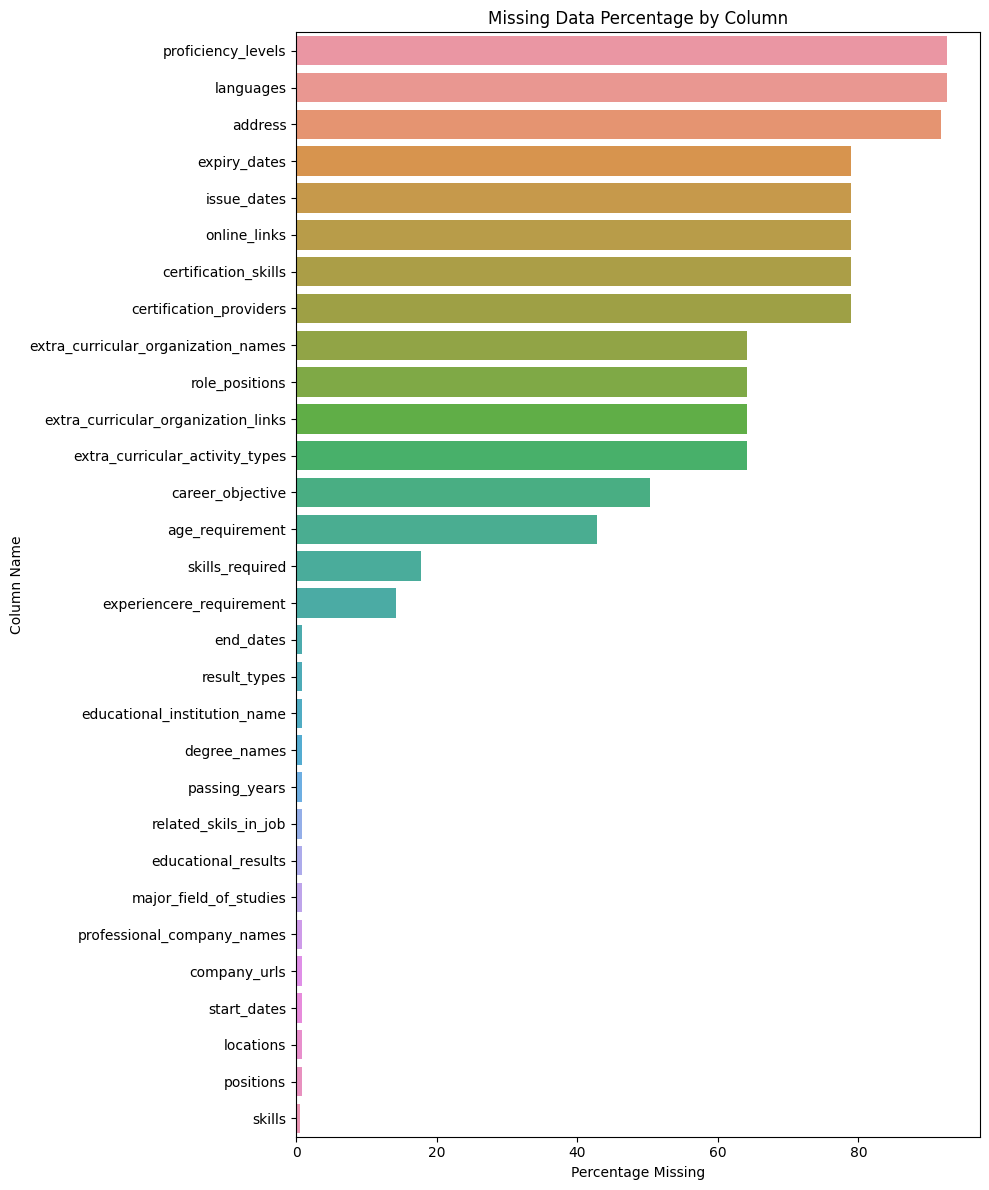

In [8]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'MissingPercentage']
missing_df = missing_df[missing_df['MissingPercentage'] > 0]

# Plot missing data percentages
plt.figure(figsize=(10, 12))
sns.barplot(data=missing_df, y='Column', x='MissingPercentage')
plt.title('Missing Data Percentage by Column')
plt.xlabel('Percentage Missing')
plt.ylabel('Column Name')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


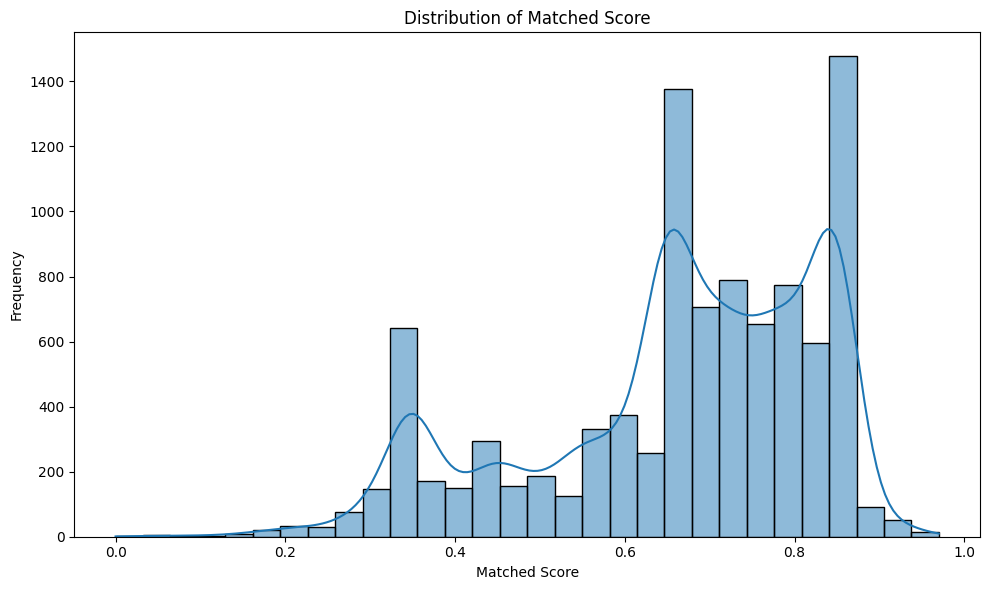

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['matched_score'], bins=30, kde=True)
plt.title('Distribution of Matched Score')
plt.xlabel('Matched Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
# Summary statistics of matched score
matched_score_stats = df['matched_score'].describe()
matched_score_stats

count    9544.000000
mean        0.660831
std         0.167040
min         0.000000
25%         0.583333
50%         0.683333
75%         0.793333
max         0.970000
Name: matched_score, dtype: float64

In [11]:
df.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', 'job_position_name',
       'educational_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

The responsibilities column is a duplicate and belongs to jobs. 

In [12]:
# Drop the columns that are not useful for analysis
df = df.drop(columns = ["responsibilities.1"])
df

address                                   career_objective  \
0        NaN  Big data analytics working and database wareho...   
1        NaN  Fresher looking to join as a data analyst and ...   
2        NaN                                                NaN   
3        NaN  To obtain a position in a fast-paced business ...   
4        NaN  Professional accountant with an outstanding wo...   
...      ...                                                ...   
9539     NaN                                                NaN   
9540     NaN  Expertise EDA modeler. I like to learn what my...   
9541     NaN  Looking for roles related to application devel...   
9542     NaN                                                NaN   
9543     NaN                                                NaN   

                                                 skills  \
0     ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1     ['Data Analysis', 'Data Analytics', 'Business ...   
2     ['Software Development', 'Machine Learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['Analytical reasoning', 'Compliance testing k...   
...                                                 ...   
9539  ['Mathematical modelling', 'Machine Learning',...   
9540  ['Data Analysis', 'Business Analysis', 'Machin...   
9541  ['Business Analyst', 'Data Analytics', 'Data C...   
9542  ['Machine Learning', 'Natural Language Process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['The Amity School of Engineering & Technology...   
1     ['Delhi University - Hansraj College', 'Delhi ...   
2       ['Birla Institute of Technology (BIT), Ranchi']   
3     ['Martinez Adult Education, Business Training ...   
4                             ['Kent State University']   
...                                                 ...   
9539                 ['Sanghvi College of Engineering']   
9540                     ['KVoCT, Pune', 'KVoCT, Pune']   
9541                             ['PGG College Mysore']   
9542        ['Rajiv Gandhi Memorial University, Delhi']   
9543                       ['ARIZONA STATE UNIVERSITY']   

                                           degree_names     passing_years  \
0                                            ['B.Tech']          ['2019']   
1       ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                            ['B.Tech']          ['2018']   
3     ['Computer Applications Specialist Certificate...          ['2008']   
4               ['Bachelor of Business Administration']            [None]   
...                                                 ...               ...   
9539                                         ['B.Tech']          ['2019']   
9540                                   ['B.CA', 'M.CA']  ['2018', '2020']   
9541                                           ['B.BA']          ['2019']   
9542                                         ['B.TECH']          ['2020']   
9543                                            ['B.A']           ['N/A']   

     educational_results    result_types  \
0                ['N/A']          [None]   
1         ['N/A', 'N/A']  ['N/A', 'N/A']   
2                ['N/A']         ['N/A']   
3                 [None]          [None]   
4               ['3.84']          [None]   
...                  ...             ...   
9539             ['N/A']         ['N/A']   
9540        [None, None]    [None, None]   
9541             ['N/A']         ['N/A']   
9542             ['N/A']         ['N/A']   
9543       ['Cum Laude']         ['N/A']   

                                 major_field_of_studies  \
0                                       ['Electronics']   
1                         ['Mathematics', 'Statistics']   
2                     ['Electronics/Telecommunication']   
3                             ['Computer Applications']   
4                                

### Divide data to Resume, Jobs

The data contains columns from both resumes, jobs. We need to divide the data into separate files to analyze them individually.

In [13]:

resume_columns = ['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates']
job_columns = ['job_position_name',
       'educational_requirements', 'responsibilities', 'experiencere_requirement',
       'age_requirement', 'skills_required']
resumes = df[resume_columns]
jobs = df[job_columns]

In [14]:
# Create a new column that combines all text columns into a single string for resumes and jobs
resumes["resume_text"] = resumes.astype(str).agg(" ".join, axis=1).str.strip()
jobs["jobs_text"] = jobs.astype(str).agg(" ".join, axis=1).str.strip()

C:\Users\HP\AppData\Local\Temp\ipykernel_25564\1348185225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumes["resume_text"] = resumes.astype(str).agg(" ".join, axis=1).str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_25564\1348185225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs["jobs_text"] = jobs.astype(str).agg(" ".join, axis=1).str.strip()


In [15]:
# Get the unique resumes in the dataset
resumes_unique = resumes.drop_duplicates().reset_index(drop=True)
resumes_unique

address                                   career_objective  \
0       NaN  Big data analytics working and database wareho...   
1       NaN  Fresher looking to join as a data analyst and ...   
2       NaN                                                NaN   
3       NaN  To obtain a position in a fast-paced business ...   
4       NaN  Professional accountant with an outstanding wo...   
..      ...                                                ...   
339     NaN  Fresher starting out and wanting to join a rol...   
340     NaN                                                NaN   
341     NaN  A business management graduate with significan...   
342     NaN                                                NaN   
343     NaN  I am a fresher looking for a Software develope...   

                                                skills  \
0    ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1    ['Data Analysis', 'Data Analytics', 'Business ...   
2    ['Software Development', 'Machine Learning', '...   
3    ['accounts payables', 'accounts receivables', ...   
4    ['Analytical reasoning', 'Compliance testing k...   
..                                                 ...   
339  ['Data Science', 'Data Analysis', 'Deep Learni...   
340  ['automation', 'budget', 'interpersonal', 'com...   
341  ['accounting system', 'Accounts Payable', 'Adm...   
342  ['Software Engineering', 'SDLC', 'Data Handlin...   
343  ['Data Analysis', 'Data Science', 'Machine Lea...   

                          educational_institution_name  \
0    ['The Amity School of Engineering & Technology...   
1    ['Delhi University - Hansraj College', 'Delhi ...   
2      ['Birla Institute of Technology (BIT), Ranchi']   
3    ['Martinez Adult Education, Business Training ...   
4                            ['Kent State University']   
..                                                 ...   
339  ['BGBS College, Mohantpur', 'BGBS College, Moh...   
340                                                NaN   
341                   ['Bridgewater State University']   
342                                    ['HIT, Haldia']   
343                                    ['JECO, Noida']   

                                          degree_names     passing_years  \
0                                           ['B.Tech']          ['2019']   
1      ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                           ['B.Tech']          ['2018']   
3    ['Computer Applications Specialist Certificate...          ['2008']   
4              ['Bachelor of Business Administration']            [None]   
..                                                 ...               ...   
339                                     ['BCA', 'MCA']  ['2018', '2020']   
340                                                NaN               NaN   
341                            ['Bachelor of Science']          ['2015']   
342                                           ['B.Sc']          ['2019']   
343                                    ['B.Tech/B.E.']            [None]   

    educational_results    result_types  \
0               ['N/A']          [None]   
1        ['N/A', 'N/A']  ['N/A', 'N/A']   
2               ['N/A']         ['N/A']   
3                [None]          [None]   
4              ['3.84']          [None]   
..                  ...             ...   
339        [None, None]    [None, None]   
340                 NaN             NaN   
341             ['N/A']         ['N/A']   
342             ['N/A']         ['N/A']   
343              [None]          [None]   

                             major_field_of_studies  \
0                                   ['Electronics']   
1                     ['Mathematics', 'Statistics']   
2                 ['Electronics/Telecommunication']   
3                         ['Computer Applications']   
4                                    ['Accounting']   
..                                              ...   
33

In [16]:
resumes_unique.shape

(344, 28)

In [17]:
jobs_unique = jobs.drop_duplicates().reset_index(drop=True)
jobs_unique

job_position_name  \
0                            Senior Software Engineer   
1                      Machine Learning (ML) Engineer   
2   Executive/ Senior Executive- Trade Marketing, ...   
3                      Business Development Executive   
4                                 Senior iOS Engineer   
5                                         AI Engineer   
6                                 Mechanical Engineer   
7                                 Mechanical Designer   
8              Asst. Manager/ Manger (Administrative)   
9                        Database Administrator (DBA)   
10  System Administrator (Operation & Maintenance ...   
11                        Project Coordinator (Civil)   
12                       Executive/ Sr. Executive -IT   
13                           Network Support Engineer   
14  Intern (Generative AI Engineering - 2D/3D Imag...   
15                                    Executive - VAT   
16            Sr.Officer / Executive - Internal Audit   
17                    Management Trainee - Mechanical   
18                                         HR Officer   
19                                    DevOps Engineer   
20                                      Data Engineer   
21  Head of Internal Control & Compliance (ICC) - ...   
22             Full Stack Developer (Python,React js)   
23                                     Civil Engineer   
24                              Data Science Engineer   
25         Manager- Human Resource Management (HRM)\n   
26                                  Marketing Officer   
27                                      Site Engineer   

                             educational_requirements  \
0   B.Sc in Computer Science & Engineering from a ...   
1   M.Sc in Computer Science & Engineering or in a...   
2             Master of Business Administration (MBA)   
3                                     Bachelor/Honors   
4       Bachelor of Science (BSc) in Computer Science   
5   Bachelors or Masters degree in Computer Scienc...   
6   Bachelor of Science (BSc) in Mechanical Engine...   
7   Bachelor’s degree in Mechanical Engineering fr...   
8                                     Bachelor/Honors   
9       Bachelor of Science (BSc) in Computer Science   
10                                    Bachelor/Honors   
11  •Bachelor of Business Administration (BBA) in ...   
12  Bachelor of Science (BSc) in Computer Science ...   
13                           Diploma, Bachelor/Honors   
14                          Bachelor of Science (BSc)   
15                      BBA in Accounting and Finance   
16  Master of Commerce (MCom) in Accounting, Must ...   
17  Fresh graduates with a Bachelor’s degree in Me...   
18  •Bachelor of Business Administration (BBA) in ...   
19                                    Bachelor/Honors   
20                          Bachelor of Science (BSc)   
21  Masters, Master of Business Administration (MB...   
22                                    Bachelor/Honors   
23  B.Sc in Civil Engineering from a reputed unive...   
24  Bachelor of Science (BSc) in Computer Science ...   
25  Masters degree in any discipline, Bachelor of ...   
26                                    Bachelor/Honors   
27     Bachelor of Science (BSc) in Civil Engineering   

                                     responsibilities  \
0   Technical Support\nTroubleshooting\nCollaborat...   
1   Machine Learning Leadership\nCross-Functional ...   
2   Trade Marketing Executive\nBrand Visibility, S...   
3   Apparel Sourcing\nQuality Garment Sourcing\nRe...   
4   iOS Lifecycle\nRequirement Analysis\nNative Fr...   
5   Machine Learning Design\nData Analysis\nModel ...   
6   Machinery Maintenance\nTroubleshooting\nReport...   
7   Design Creation\nCAD Drawings\nDesign Optimiza...   
8   Administrative Support\nScheduling\nFiling & D...   
9   Database Design & Development\nSQL Query Optim...   
10  Hardware & Network Installation\nTroubleshooti...   
11  Project Design\nData Analysis\nACCORD/Al

In [18]:
jobs_unique.shape

(28, 7)

From the data, we can see there are only 344 unique resumes, 28 jobs descriptions in the data.
Here, we will face a challenge with the limited data available to analyze resumes, jobs to extract any patterns in the data

### N gram analysis

In [19]:
from helper import *

In [20]:
jobs_unique.columns

Index(['job_position_name', 'educational_requirements', 'responsibilities',
       'experiencere_requirement', 'age_requirement', 'skills_required',
       'jobs_text'],
      dtype='object')

In [21]:
resumes_unique.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', 'resume_text'],
      dtype='object')

In [22]:
get_ngram_frequencies(resumes_unique['resume_text'], n=3).head(25)

(nan, nan, nan)                    2566
(none, none, none)                  882
(a, n, a)                           697
(n, a, n)                           696
(name, company, name)               490
(company, name, company)            490
(city, state, city)                 450
(state, city, state)                446
(company, name, none)               143
(name, none, none)                  143
(n, a, nan)                         106
(state, nan, nan)                   104
(city, state, nan)                  102
(a, nan, nan)                       101
(n, a, none)                         88
(bachelor, of, science)              76
(2019, n, a)                         62
(none, nan, nan)                     56
(natural, language, processing)      53
(none, n, a)                         48
(none, none, nan)                    44
(2020, n, a)                         43
(intern, n, a)                       42
(a, none, none)                      41
(2019, till, date)                   33


In [23]:
get_ngram_frequencies(jobs_unique['jobs_text'], n=4).head(25)

(bachelor, of, science, bsc)                8
(of, science, bsc, in)                      6
(years, age, 25, to)                        5
(in, computer, science, engineering)        5
(engineer, bachelor, of, science)           5
(bsc, in, computer, science)                4
(science, bsc, in, computer)                4
(5, years, age, at)                         4
(bachelor, of, business, administration)    3
(least, 5, years, age)                      3
(years, age, at, least)                     3
(at, least, 1, year)                        3
(at, least, 5, years)                       3
(of, business, administration, bba)         3
(from, a, reputed, university)              3
(engineering, from, a, reputed)             3
(25, to, 40, years)                         3
(age, 25, to, 40)                           3
(at, least, 3, years)                       3
(least, 3, years, nan)                      2
(computer, science, engineering, or)        2
(business, administration, bba, in


Generating Word Cloud for educational_requirements



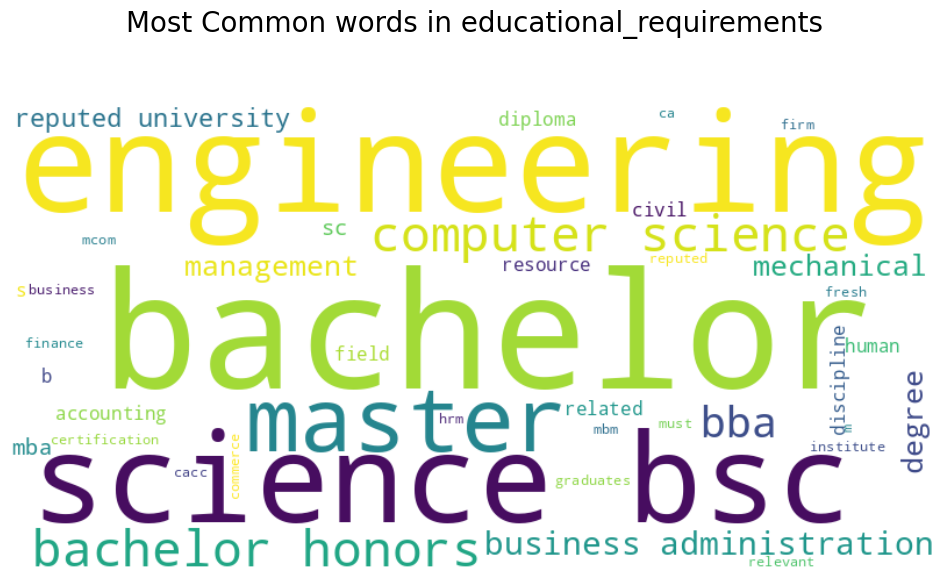

In [24]:
column_name = "educational_requirements"
text = process_skills_text(jobs_unique[column_name])
print(f"\nGenerating Word Cloud for {column_name}\n")
plot_wordcloud(text, f"Most Common words in {column_name}\n\n")


Generating Word Cloud for degree_names



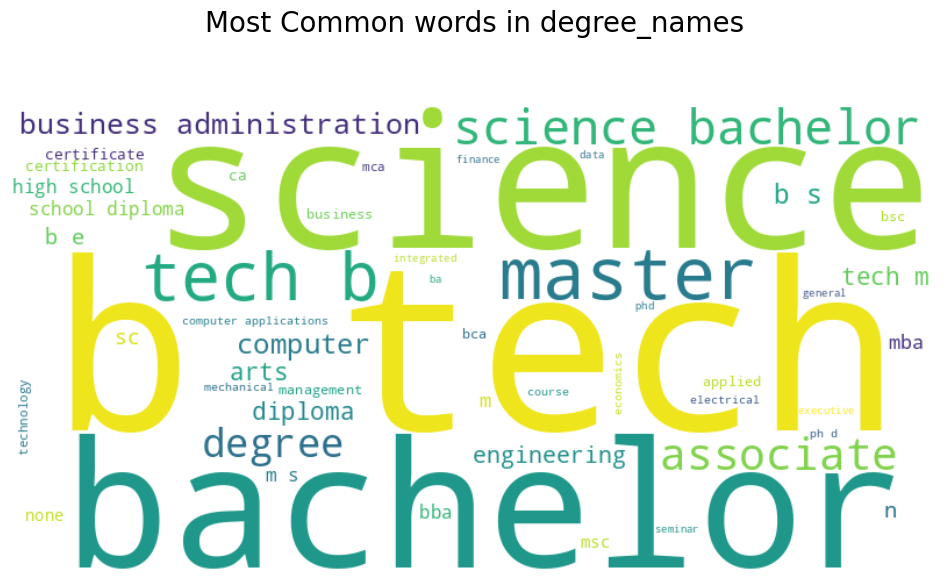

In [25]:
column_name = "degree_names"
text = process_skills_text(resumes_unique[column_name])
print(f"\nGenerating Word Cloud for {column_name}\n")
plot_wordcloud(text, f"Most Common words in {column_name}\n\n")


Generating Word Cloud for job_position_name



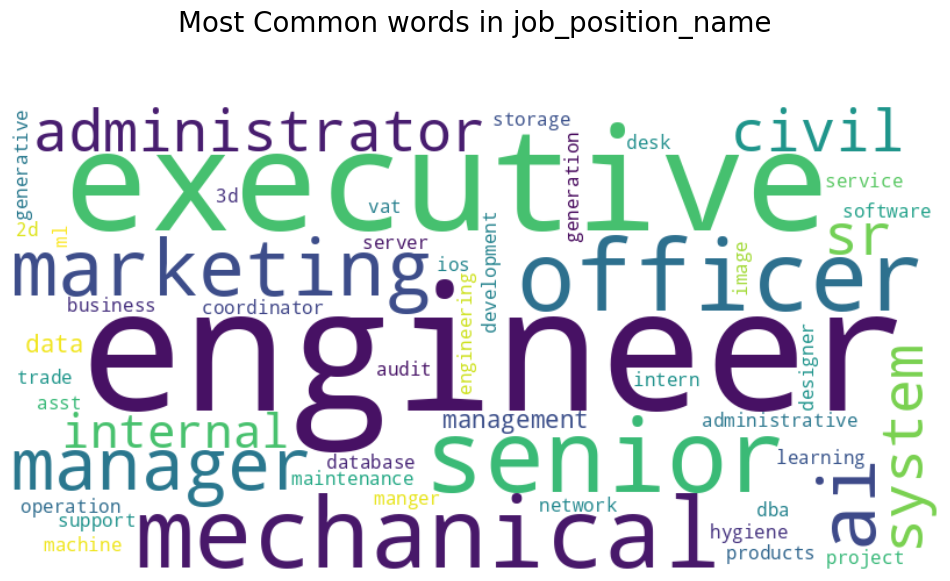

In [26]:
column_name = "job_position_name"
text = process_skills_text(jobs_unique[column_name])
print(f"\nGenerating Word Cloud for {column_name}\n")
plot_wordcloud(text, f"Most Common words in {column_name}\n\n")

In [27]:
# Print the unique values in columns to understand the data better
print_unique_values(resumes_unique['degree_names'])

Unique values in column 'degree_names':
Ph.D.
Associates
Diploma
GED
Bachelor of Computer Applications
B.TECH(COMPUTERS)
M.Tech
Associate of Science
A-651-0119, Engineering Electrical
Bachelors of Science
M.A (Economics), Correspondence/Distance Learning
Master of Business Administration (M.B.A
Master of Business
B.A (Economics)
Bachelor of Commerce
BBA
Masters of Public Administration
Bachelor of Science
B.A
ACCA II Part Qualified
Master's in Business Administration (International Business)
Bachelor of Science /Arts
M.S
B.S
Master of Computer Applications
Trained as Accountant
B.E. (Computers)
Vordiplom (comparable to BSc) in Computer Science
A.S
Dual Degree (B.tech + M.Tech)(Chemical)
BSc
Course Revisions for the: National Electrical Code
B.Tech. (Electrical Engineering Specialization in Computer Science)
M.CA
M.Com (Master of Commerce)
BCA
Skills
N/A
Pharmacy Technician
Bachelor's degree
KCPE
Bachelor of Science degree
B. Tech
M.Sc (Science) (Statistics)
B.S.I.T
Associate of Arts
Du

High level summary:

1. The dataset has 9544 rows and 35 columns.
2. There are 344 unique resumes and 28 unique jobs.
3. Target is matched_score. It has multi modal distribution with some right skewness. There are no outliers in the matched_score.
4. There are missing values in many columns - most in address, languages, proficiency levels, some of them are dropped.
5. There are many synonyms, acronyms in the data which need to be handled.

# Pre Processing and Feature Engineering

Before we go ahead with the analysis, we have to preprocess the data:

1. Lower casing - To avoid duplicates with casing
2. Remove stop words - Remove less important english stop words like "is, of, are, etc"
3. Handle synonyms, acronyms - Replace synonyms, acronyms with a consistant word
4. Lemmentation - Replace the words with base form - It improves the performance for similarity checking.
5. Remove duplicates - Removing duplicates will normalize the data giving equal importance to all remaining words and not their frequencies, but we will have to experiement with this method.
6. Remove HTML - Already dropped
7. Remove punctuations

### Resume, Job IDs

Since we have unique resumes, unique jobs, first we will need to merge them back. But, we will need to track the ids of the unique resumes, jobs. So, we will create job id, resume id.

In [28]:
resumes_unique.insert(0, 'resume_id', [i+1 for i in range(len(resumes_unique))])
jobs_unique.insert(0, 'job_id', [i+1 for i in range(len(jobs_unique))])
# Store the unique resumes, jobs in CSV files
resumes_unique.to_csv('../data/processed/resumes_unique.csv', index=False)
jobs_unique.to_csv('../data/processed/jobs_unique.csv', index=False)

In [39]:
# Merge the resumes and jobs dataframes with unique ids with the original dataset
df_with_resume_id = df.merge(resumes_unique, how="left", on=resume_columns)
df_with_ids = df_with_resume_id.merge(jobs_unique, how="left", on=job_columns)
df_with_ids.head()

address                                   career_objective  \
0     NaN  Big data analytics working and database wareho...   
1     NaN  Fresher looking to join as a data analyst and ...   
2     NaN                                                NaN   
3     NaN  To obtain a position in a fast-paced business ...   
4     NaN  Professional accountant with an outstanding wo...   

                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Business ...   
2  ['Software Development', 'Machine Learning', '...   
3  ['accounts payables', 'accounts receivables', ...   
4  ['Analytical reasoning', 'Compliance testing k...   

                        educational_institution_name  \
0  ['The Amity School of Engineering & Technology...   
1  ['Delhi University - Hansraj College', 'Delhi ...   
2    ['Birla Institute of Technology (BIT), Ranchi']   
3  ['Martinez Adult Education, Business Training ...   
4                          ['Kent State University']   

                                        degree_names     passing_years  \
0                                         ['B.Tech']          ['2019']   
1    ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                         ['B.Tech']          ['2018']   
3  ['Computer Applications Specialist Certificate...          ['2008']   
4            ['Bachelor of Business Administration']            [None]   

  educational_results    result_types             major_field_of_studies  \
0             ['N/A']          [None]                    ['Electronics']   
1      ['N/A', 'N/A']  ['N/A', 'N/A']      ['Mathematics', 'Statistics']   
2             ['N/A']         ['N/A']  ['Electronics/Telecommunication']   
3              [None]          [None]          ['Computer Applications']   
4            ['3.84']          [None]                     ['Accounting']   

                          professional_company_names  ...  \
0                                      ['Coca-COla']  ...   
1                                ['BIB Consultancy']  ...   
2                              ['Axis Bank Limited']  ...   
3  ['Company Name ï¼ City , State', 'Company Name...  ...   
4  ['Company Name', 'Company Name', 'Company Name...  ...   

                                   job_position_name  \
0                           Senior Software Engineer   
1                     Machine Learning (ML) Engineer   
2  Executive/ Senior Executive- Trade Marketing, ...   
3                     Business Development Executive   
4                                Senior iOS Engineer   

                            educational_requirements experiencere_requirement  \
0  B.Sc in Computer Science & Engineering from a ...          At least 1 year   
1  M.Sc in Computer Science & Engineering or in a...       At least 5 year(s)   
2            Master of Business Administration (MBA)         At least 3 years   
3                                    Bachelor/Honors             1 to 3 years   
4      Bachelor of Science (BSc) in Computer Science         At least 4 years   

      age_requirement                                    skills_required  \
0                 NaN                                                NaN   
1                 NaN                                                NaN   
2                 NaN  Brand Promotion\nCampaign Management\nField Su...   
3  Age 22 to 30 years  Fast typing skill\nIELTSInternet browsing & on...   
4                 NaN  iOS\niOS App Developer\niOS Application Develo...   

  matched_score resume_id                                        resume_text  \
0      0.850000         1  nan Big data analytics working and database wa...   
1      0.750000         2  nan Fresher looking to join as a data analyst ...   
2      0.416667         3  nan nan ['Software Development', 'Machine Lear...   
3      0.760000         4  nan To obtain a position in a fast-paced busin

In [40]:
resumes = df_with_ids[resume_columns + ['resume_id']]
jobs = df_with_ids[job_columns + ['job_id']]

In [41]:
# Create a copy of the dataframe with ids for further processing
data = df_with_ids.copy()

### Data Checkpoint 1

Save the data here for content based recommender system where the data pre processing is not completed.

In [42]:
data.to_csv("../data/processed/1_checkpoint_content_before_preprocessing.csv", index=False)

### Total Experience Years

We have experience in numbers in resumes, jobs which is valuable for predicting matched score. But, TFIDF does not work great for numbers. So, we will extract the experience in resumes and minimum experience required in jobs and store them in separate columns.

In [43]:
from helper import *

In [ ]:
data['total_experience'] = data.apply(calculate_resume_experience_from_lists, axis=1)

### Minimum required experience

In [ ]:
# Fill NaN values in 'experiencere_requirement' with empty strings
data['experiencere_requirement'].fillna('', inplace=True)

In [ ]:
data['min_experience_required'] = data['experiencere_requirement'].apply(extract_min_experience)

### Experience matching

Using the two columns, we can calculate the total experience match a person has in excess to the required experience.

In [ ]:
data["experience_match"] = data["total_experience"] - data["min_experience_required"]

In [38]:
data

address                                   career_objective  \
0        NaN  Big data analytics working and database wareho...   
1        NaN  Fresher looking to join as a data analyst and ...   
2        NaN                                                NaN   
3        NaN  To obtain a position in a fast-paced business ...   
4        NaN  Professional accountant with an outstanding wo...   
...      ...                                                ...   
9539     NaN                                                NaN   
9540     NaN  Expertise EDA modeler. I like to learn what my...   
9541     NaN  Looking for roles related to application devel...   
9542     NaN                                                NaN   
9543     NaN                                                NaN   

                                                 skills  \
0     ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1     ['Data Analysis', 'Data Analytics', 'Business ...   
2     ['Software Development', 'Machine Learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['Analytical reasoning', 'Compliance testing k...   
...                                                 ...   
9539  ['Mathematical modelling', 'Machine Learning',...   
9540  ['Data Analysis', 'Business Analysis', 'Machin...   
9541  ['Business Analyst', 'Data Analytics', 'Data C...   
9542  ['Machine Learning', 'Natural Language Process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['The Amity School of Engineering & Technology...   
1     ['Delhi University - Hansraj College', 'Delhi ...   
2       ['Birla Institute of Technology (BIT), Ranchi']   
3     ['Martinez Adult Education, Business Training ...   
4                             ['Kent State University']   
...                                                 ...   
9539                 ['Sanghvi College of Engineering']   
9540                     ['KVoCT, Pune', 'KVoCT, Pune']   
9541                             ['PGG College Mysore']   
9542        ['Rajiv Gandhi Memorial University, Delhi']   
9543                       ['ARIZONA STATE UNIVERSITY']   

                                           degree_names     passing_years  \
0                                            ['B.Tech']          ['2019']   
1       ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                            ['B.Tech']          ['2018']   
3     ['Computer Applications Specialist Certificate...          ['2008']   
4               ['Bachelor of Business Administration']            [None]   
...                                                 ...               ...   
9539                                         ['B.Tech']          ['2019']   
9540                                   ['B.CA', 'M.CA']  ['2018', '2020']   
9541                                           ['B.BA']          ['2019']   
9542                                         ['B.TECH']          ['2020']   
9543                                            ['B.A']           ['N/A']   

     educational_results    result_types  \
0                ['N/A']          [None]   
1         ['N/A', 'N/A']  ['N/A', 'N/A']   
2                ['N/A']         ['N/A']   
3                 [None]          [None]   
4               ['3.84']          [None]   
...                  ...             ...   
9539             ['N/A']         ['N/A']   
9540        [None, None]    [None, None]   
9541             ['N/A']         ['N/A']   
9542             ['N/A']         ['N/A']   
9543       ['Cum Laude']         ['N/A']   

                                 major_field_of_studies  \
0                                       ['Electronics']   
1                         ['Mathematics', 'Statistics']   
2                     ['Electronics/Telecommunication']   
3                             ['Computer Applications']   
4                                

### Fill None/Na values

In [39]:
placeholders = ["None", "none", "N/A", "n/a", "NA", "null", "Null", "-", "--", None, pd.NA, np.nan]

In [40]:
for col in data.columns:
    data[col] = data[col].replace(placeholders, "", regex=True)
    data[col] = data[col].fillna("")  # Handle actual NaNs as well

In [41]:
data

address                                   career_objective  \
0             Big data analytics working and database wareho...   
1             Fresher looking to join as a data analyst and ...   
2                                                                 
3             To obtain a position in a fastpaced business o...   
4             Professional accountant with an outstanding wo...   
...      ...                                                ...   
9539                                                              
9540          Expertise EDA modeler. I like to learn what my...   
9541          Looking for roles related to application devel...   
9542                                                              
9543                                                              

                                                 skills  \
0     ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1     ['Data Analysis', 'Data Analytics', 'Business ...   
2     ['Software Development', 'Machine Learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['Analytical reasoning', 'Compliance testing k...   
...                                                 ...   
9539  ['Mathematical modelling', 'Machine Learning',...   
9540  ['Data Analysis', 'Business Analysis', 'Machin...   
9541  ['Business Analyst', 'Data Analytics', 'Data C...   
9542  ['Machine Learning', 'Natural Language Process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['The Amity School of Engineering & Technology...   
1     ['Delhi University  Hansraj College', 'Delhi U...   
2       ['Birla Institute of Technology (BIT), Ranchi']   
3     ['Martinez Adult Education, Business Training ...   
4                             ['Kent State University']   
...                                                 ...   
9539                 ['Sanghvi College of Engineering']   
9540                     ['KVoCT, Pune', 'KVoCT, Pune']   
9541                             ['PGG College Mysore']   
9542        ['Rajiv Gandhi Memorial University, Delhi']   
9543                         ['ARIZO STATE UNIVERSITY']   

                                           degree_names     passing_years  \
0                                            ['B.Tech']          ['2019']   
1       ['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']  ['2015', '2018']   
2                                            ['B.Tech']          ['2018']   
3     ['Computer Applications Specialist Certificate...          ['2008']   
4               ['Bachelor of Business Administration']                []   
...                                                 ...               ...   
9539                                         ['B.Tech']          ['2019']   
9540                                   ['B.CA', 'M.CA']  ['2018', '2020']   
9541                                           ['B.BA']          ['2019']   
9542                                         ['B.TECH']          ['2020']   
9543                                            ['B.A']              ['']   

     educational_results result_types  \
0                   ['']           []   
1               ['', '']     ['', '']   
2                   ['']         ['']   
3                     []           []   
4               ['3.84']           []   
...                  ...          ...   
9539                ['']         ['']   
9540                [, ]         [, ]   
9541                ['']         ['']   
9542                ['']         ['']   
9543       ['Cum Laude']         ['']   

                                 major_field_of_studies  \
0                                       ['Electronics']   
1                         ['Mathematics', 'Statistics']   
2                     ['Electronics/Telecommunication']   
3                             ['Computer Applications']   
4                                        ['Accounting']   
...       

### Lower case

In [42]:
# Convert all the columns to lower case
def to_lowercase(series):
    return series.str.lower()

In [43]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = to_lowercase(data[col])

In [44]:
data

address                                   career_objective  \
0             big data analytics working and database wareho...   
1             fresher looking to join as a data analyst and ...   
2                                                                 
3             to obtain a position in a fastpaced business o...   
4             professional accountant with an outstanding wo...   
...      ...                                                ...   
9539                                                              
9540          expertise eda modeler. i like to learn what my...   
9541          looking for roles related to application devel...   
9542                                                              
9543                                                              

                                                 skills  \
0     ['big data', 'hadoop', 'hive', 'python', 'mapr...   
1     ['data analysis', 'data analytics', 'business ...   
2     ['software development', 'machine learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['analytical reasoning', 'compliance testing k...   
...                                                 ...   
9539  ['mathematical modelling', 'machine learning',...   
9540  ['data analysis', 'business analysis', 'machin...   
9541  ['business analyst', 'data analytics', 'data c...   
9542  ['machine learning', 'natural language process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['the amity school of engineering & technology...   
1     ['delhi university  hansraj college', 'delhi u...   
2       ['birla institute of technology (bit), ranchi']   
3     ['martinez adult education, business training ...   
4                             ['kent state university']   
...                                                 ...   
9539                 ['sanghvi college of engineering']   
9540                     ['kvoct, pune', 'kvoct, pune']   
9541                             ['pgg college mysore']   
9542        ['rajiv gandhi memorial university, delhi']   
9543                         ['arizo state university']   

                                           degree_names     passing_years  \
0                                            ['b.tech']          ['2019']   
1       ['b.sc (maths)', 'm.sc (science) (statistics)']  ['2015', '2018']   
2                                            ['b.tech']          ['2018']   
3     ['computer applications specialist certificate...          ['2008']   
4               ['bachelor of business administration']                []   
...                                                 ...               ...   
9539                                         ['b.tech']          ['2019']   
9540                                   ['b.ca', 'm.ca']  ['2018', '2020']   
9541                                           ['b.ba']          ['2019']   
9542                                         ['b.tech']          ['2020']   
9543                                            ['b.a']              ['']   

     educational_results result_types  \
0                   ['']           []   
1               ['', '']     ['', '']   
2                   ['']         ['']   
3                     []           []   
4               ['3.84']           []   
...                  ...          ...   
9539                ['']         ['']   
9540                [, ]         [, ]   
9541                ['']         ['']   
9542                ['']         ['']   
9543       ['cum laude']         ['']   

                                 major_field_of_studies  \
0                                       ['electronics']   
1                         ['mathematics', 'statistics']   
2                     ['electronics/telecommunication']   
3                             ['computer applications']   
4                                        ['accounting']   
...       

In [45]:
data_df = data.copy()

### Remove Punctuations

In [46]:
data = data.applymap(lambda x: re.sub(r'[^\w\s]', ' ', str(x)) if isinstance(x, str) else x)

/var/folders/pc/1fr1sz8j27l45vcjzqzbd_cm0000gn/T/ipykernel_33954/625236957.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: re.sub(r'[^\w\s]', ' ', str(x)) if isinstance(x, str) else x)


In [47]:
data

address                                   career_objective  \
0             big data analytics working and database wareho...   
1             fresher looking to join as a data analyst and ...   
2                                                                 
3             to obtain a position in a fastpaced business o...   
4             professional accountant with an outstanding wo...   
...      ...                                                ...   
9539                                                              
9540          expertise eda modeler  i like to learn what my...   
9541          looking for roles related to application devel...   
9542                                                              
9543                                                              

                                                 skills  \
0       big data    hadoop    hive    python    mapr...   
1       data analysis    data analytics    business ...   
2       software development    machine learning    ...   
3       accounts payables    accounts receivables   ...   
4       analytical reasoning    compliance testing k...   
...                                                 ...   
9539    mathematical modelling    machine learning  ...   
9540    data analysis    business analysis    machin...   
9541    business analyst    data analytics    data c...   
9542    machine learning    natural language process...   
9543    assisted living    interpersonal and communi...   

                           educational_institution_name  \
0       the amity school of engineering   technology...   
1       delhi university  hansraj college    delhi u...   
2         birla institute of technology  bit   ranchi     
3       martinez adult education  business training ...   
4                               kent state university     
...                                                 ...   
9539                   sanghvi college of engineering     
9540                       kvoct  pune    kvoct  pune     
9541                               pgg college mysore     
9542          rajiv gandhi memorial university  delhi     
9543                           arizo state university     

                                           degree_names     passing_years  \
0                                              b tech              2019     
1         b sc  maths     m sc  science   statistics       2015    2018     
2                                              b tech              2018     
3       computer applications specialist certificate...            2008     
4                 bachelor of business administration                       
...                                                 ...               ...   
9539                                           b tech              2019     
9540                                     b ca    m ca      2018    2020     
9541                                             b ba              2019     
9542                                           b tech              2020     
9543                                              b a                       

     educational_results result_types  \
0                                       
1                                       
2                                       
3                                       
4                 3 84                  
...                  ...          ...   
9539                                    
9540                                    
9541                                    
9542                                    
9543         cum laude                  

                                 major_field_of_studies  \
0                                         electronics     
1                           mathematics    statistics     
2                       electronics telecommunication     
3                               computer applications     
4                                          accounting     
...       

### Data Checkpoint 2

Checkpoint before handling synonyms/acronyms

In [48]:
data["resume_text"] = data[resume_columns].astype(str).agg(" ".join, axis=1).str.strip()
data["jobs_text"] = data[job_columns].astype(str).agg(" ".join, axis=1).str.strip()
data.to_csv("../data/processed/2_checkpoint_after_null.csv", index=False)

### Handle acronyms and synonyms

There are many synonyms and acronyms in the especially in degree names, job skills. These need to handled to get better performance with similarity scoring.

Choose to do this step or skip the step based on the performance of the data.

In [49]:
import json

In [50]:
# Replace MS in degree_names with master of science
data_df['degree_names'] = data_df['degree_names'].str.replace(r'\bms\b', 'master of science', regex=True)

In [51]:
# Open the json file containing the mapping
with open("synonym_json_cleaned.json", "r") as file:
    synonym_mapping = json.load(file)

In [52]:
# In all columns, check if keys in synonym_mapping are present and replace them with their values
def replace_synonyms(series, mapping):
    for key, value in mapping.items():
        series = series.str.replace(r'\b' + re.escape(key) + r'\b', value, regex=True)
    return series
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = replace_synonyms(data_df[col], synonym_mapping)

In [53]:
data_df

address                                   career_objective  \
0             big data analytics working and database wareho...   
1             fresher looking to join associate of science a...   
2                                                                 
3             to obtain a position in a fastpaced business o...   
4             professional accountant with an outstanding wo...   
...      ...                                                ...   
9539                                                              
9540          expertise exploratory data analysis modeler. i...   
9541          looking for roles related to application devel...   
9542                                                              
9543                                                              

                                                 skills  \
0     ['big data', 'hadoop', 'hive', 'python', 'mapr...   
1     ['data analysis', 'data analytics', 'business ...   
2     ['software development', 'machine learning', '...   
3     ['accounts payables', 'accounts receivables', ...   
4     ['analytical reasoning', 'compliance testing k...   
...                                                 ...   
9539  ['mathematical model', 'machine learning', 'pr...   
9540  ['data analysis', 'business analysis', 'machin...   
9541  ['business analyst', 'data analytics', 'data c...   
9542  ['machine learning', 'natural language process...   
9543  ['assisted living', 'interpersonal and communi...   

                           educational_institution_name  \
0     ['the amity school of engineering & technology...   
1     ['delhi university  hansraj college', 'delhi u...   
2       ['birla institute of technology (bit), ranchi']   
3     ['martinez adult education, business training ...   
4                             ['kent state university']   
...                                                 ...   
9539                 ['sanghvi college of engineering']   
9540                     ['kvoct, pune', 'kvoct, pune']   
9541                             ['pgg college mysore']   
9542        ['rajiv gandhi memorial university, delhi']   
9543                         ['arizo state university']   

                                           degree_names     passing_years  \
0                            ['bachelor of technology']          ['2019']   
1     ['bachelor of science (maths)', 'master of sci...  ['2015', '2018']   
2                            ['bachelor of technology']          ['2018']   
3     ['computer applications specialist certificate...          ['2008']   
4               ['bachelor of business administration']                []   
...                                                 ...               ...   
9539                         ['bachelor of technology']          ['2019']   
9540  ['b.computer applications', 'master of compute...  ['2018', '2020']   
9541            ['bachelor of business administration']          ['2019']   
9542                         ['bachelor of technology']          ['2020']   
9543                               ['bachelor of arts']              ['']   

     educational_results result_types  \
0                   ['']           []   
1               ['', '']     ['', '']   
2                   ['']         ['']   
3                     []           []   
4               ['3.84']           []   
...                  ...          ...   
9539                ['']         ['']   
9540                [, ]         [, ]   
9541                ['']         ['']   
9542                ['']         ['']   
9543       ['cum laude']         ['']   

                                 major_field_of_studies  \
0                                       ['electronics']   
1                         ['mathematics', 'statistics']   
2                     ['electronics/telecommunication']   
3                             ['computer applications']   
4                                        ['accounting']   
...       

In [54]:
data_df = data_df.applymap(lambda x: re.sub(r'[^\w\s]', ' ', str(x)) if isinstance(x, str) else x)

/var/folders/pc/1fr1sz8j27l45vcjzqzbd_cm0000gn/T/ipykernel_33954/3226765540.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_df = data_df.applymap(lambda x: re.sub(r'[^\w\s]', ' ', str(x)) if isinstance(x, str) else x)


In [55]:
# Remove extra spaces in all columns
def remove_extra_spaces(text):
    if isinstance(text, str):
        return re.sub(r'\s+', ' ', text).strip()
    return text
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = data_df[col].apply(remove_extra_spaces)
data_df

address                                   career_objective  \
0             big data analytics working and database wareho...   
1             fresher looking to join associate of science a...   
2                                                                 
3             to obtain a position in a fastpaced business o...   
4             professional accountant with an outstanding wo...   
...      ...                                                ...   
9539                                                              
9540          expertise exploratory data analysis modeler i ...   
9541          looking for roles related to application devel...   
9542                                                              
9543                                                              

                                                 skills  \
0     big data hadoop hive python mapreduce spark ja...   
1     data analysis data analytics business analysis...   
2     software development machine learning deep lea...   
3     accounts payables accounts receivables account...   
4     analytical reasoning compliance testing knowle...   
...                                                 ...   
9539  mathematical model machine learning predictive...   
9540  data analysis business analysis machine learni...   
9541  business analyst data analytics data cleansing...   
9542  machine learning natural language processing d...   
9543  assisted living interpersonal and communicatio...   

                           educational_institution_name  \
0     the amity school of engineering technology ase...   
1     delhi university hansraj college delhi univers...   
2              birla institute of technology bit ranchi   
3     martinez adult education business training cen...   
4                                 kent state university   
...                                                 ...   
9539                     sanghvi college of engineering   
9540                              kvoct pune kvoct pune   
9541                                 pgg college mysore   
9542             rajiv gandhi memorial university delhi   
9543                             arizo state university   

                                           degree_names passing_years  \
0                                bachelor of technology          2019   
1     bachelor of science maths master of science sc...     2015 2018   
2                                bachelor of technology          2018   
3     computer applications specialist certificate p...          2008   
4                   bachelor of business administration                 
...                                                 ...           ...   
9539                             bachelor of technology          2019   
9540  b computer applications master of computer app...     2018 2020   
9541                bachelor of business administration          2019   
9542                             bachelor of technology          2020   
9543                                   bachelor of arts                 

     educational_results result_types  \
0                                       
1                                       
2                                       
3                                       
4                   3 84                
...                  ...          ...   
9539                                    
9540                                    
9541                                    
9542                                    
9543           cum laude                

                                major_field_of_studies  \
0                                          electronics   
1                               mathematics statistics   
2                        electronics telecommunication   
3                                computer applications   
4                                           accounting   
...                                                ...   
9539  

### Stop words

In [57]:
# Remove stop words from the text columns
def remove_stop_words(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

In [58]:
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = data_df[col].apply(remove_stop_words)

In [59]:
data_df

address                                   career_objective  \
0             big data analytics working database warehouse ...   
1             fresher looking join associate science data an...   
2                                                                 
3             obtain position fastpaced business office envi...   
4             professional accountant outstanding work ethic...   
...      ...                                                ...   
9539                                                              
9540          expertise exploratory data analysis modeler li...   
9541          looking roles related application development ...   
9542                                                              
9543                                                              

                                                 skills  \
0     big data hadoop hive python mapreduce spark ja...   
1     data analysis data analytics business analysis...   
2     software development machine learning deep lea...   
3     accounts payables accounts receivables account...   
4     analytical reasoning compliance testing knowle...   
...                                                 ...   
9539  mathematical model machine learning predictive...   
9540  data analysis business analysis machine learni...   
9541  business analyst data analytics data cleansing...   
9542  machine learning natural language processing d...   
9543  assisted living interpersonal communication in...   

                           educational_institution_name  \
0        amity school engineering technology aset noida   
1     delhi university hansraj college delhi univers...   
2                 birla institute technology bit ranchi   
3     martinez adult education business training cen...   
4                                 kent state university   
...                                                 ...   
9539                        sanghvi college engineering   
9540                              kvoct pune kvoct pune   
9541                                 pgg college mysore   
9542             rajiv gandhi memorial university delhi   
9543                             arizo state university   

                                           degree_names passing_years  \
0                                   bachelor technology          2019   
1     bachelor science maths master science science ...     2015 2018   
2                                   bachelor technology          2018   
3     computer applications specialist certificate p...          2008   
4                      bachelor business administration                 
...                                                 ...           ...   
9539                                bachelor technology          2019   
9540  b computer applications master computer applic...     2018 2020   
9541                   bachelor business administration          2019   
9542                                bachelor technology          2020   
9543                                      bachelor arts                 

     educational_results result_types  \
0                                       
1                                       
2                                       
3                                       
4                   3 84                
...                  ...          ...   
9539                                    
9540                                    
9541                                    
9542                                    
9543           cum laude                

                                major_field_of_studies  \
0                                          electronics   
1                               mathematics statistics   
2                        electronics telecommunication   
3                                computer applications   
4                                           accounting   
...                                                ...   
9539  

### Data Checkpoint 3

Store the data here before performing the lemmentation/stemming

In [60]:
data_df["resume_text"] = data_df[resume_columns].astype(str).agg(" ".join, axis=1).str.strip()
data_df["jobs_text"] = data_df[job_columns].astype(str).agg(" ".join, axis=1).str.strip()
data_df.to_csv("../data/processed/3_checkpoint_before_lemmentation.csv", index=False)

### Lemmentation

We have observed the model is not performing great after doing lemmentation. We can perform this as an experiment to store the data.

In [61]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krishnakalakonda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/krishnakalakonda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
# Apply lemmatization to the text columns
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [63]:
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = data_df[col].apply(lemmatize_text)

In [64]:
data_df

address                                   career_objective  \
0             big data analytics working database warehouse ...   
1             fresher looking join associate science data an...   
2                                                                 
3             obtain position fastpaced business office envi...   
4             professional accountant outstanding work ethic...   
...      ...                                                ...   
9539                                                              
9540          expertise exploratory data analysis modeler li...   
9541          looking role related application development m...   
9542                                                              
9543                                                              

                                                 skills  \
0     big data hadoop hive python mapreduce spark ja...   
1     data analysis data analytics business analysis...   
2     software development machine learning deep lea...   
3     account payable account receivables account pa...   
4     analytical reasoning compliance testing knowle...   
...                                                 ...   
9539  mathematical model machine learning predictive...   
9540  data analysis business analysis machine learni...   
9541  business analyst data analytics data cleansing...   
9542  machine learning natural language processing d...   
9543  assisted living interpersonal communication in...   

                           educational_institution_name  \
0        amity school engineering technology aset noida   
1     delhi university hansraj college delhi univers...   
2                 birla institute technology bit ranchi   
3     martinez adult education business training cen...   
4                                 kent state university   
...                                                 ...   
9539                        sanghvi college engineering   
9540                              kvoct pune kvoct pune   
9541                                 pgg college mysore   
9542             rajiv gandhi memorial university delhi   
9543                             arizo state university   

                                           degree_names passing_years  \
0                                   bachelor technology          2019   
1     bachelor science math master science science s...     2015 2018   
2                                   bachelor technology          2018   
3     computer application specialist certificate pr...          2008   
4                      bachelor business administration                 
...                                                 ...           ...   
9539                                bachelor technology          2019   
9540  b computer application master computer applica...     2018 2020   
9541                   bachelor business administration          2019   
9542                                bachelor technology          2020   
9543                                       bachelor art                 

     educational_results result_types  \
0                                       
1                                       
2                                       
3                                       
4                   3 84                
...                  ...          ...   
9539                                    
9540                                    
9541                                    
9542                                    
9543           cum laude                

                                major_field_of_studies  \
0                                          electronics   
1                                mathematics statistic   
2                        electronics telecommunication   
3                                 computer application   
4                                           accounting   
...                                                ...   
9539  

### Drop columns

In [65]:
data_df.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', 'job_position_name',
       'educational_requirements', 'experiencere_requirement',
       'age_requirement', 'skills_required', 'matched_score', 'resume_id',
       'resume_text', 'job_id', 'jobs_text', 'total_experience',
       'min_experience_required', 'experience_match'],
      dtype='object')

In [66]:
data_df.drop(columns=["address","company_urls","locations","extra_curricular_organization_links","online_links","issue_dates","expiry_dates"], inplace=True)

In [67]:
# Recreate the resume and job text columns after preprocessing
resume_columns = ['career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'extra_curricular_activity_types',
       'extra_curricular_organization_names', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills']
job_columns = ['job_position_name', 'educational_requirements', 'responsibilities',
       'experiencere_requirement', 'age_requirement', 'skills_required']
# Create a new column that combines all the text from resume columns to one string
data_df['resume_text'] = data_df[resume_columns].astype(str).agg(' '.join, axis=1).str.strip()
# Create a new column that combines all the text from job columns to one string
data_df['jobs_text'] = data_df[job_columns].astype(str).agg(' '.join, axis=1).str.strip()

### Data Checkpoint 4

Store the data here after performing the lemmentation

In [68]:
data_df.to_csv("../data/processed/4_checkpoint_after_lemmentation.csv", index=False)

### Matching skills ratio

Matching skills ratio checks the ratio of required skills present in the job resume

In [69]:
matching_ratio = []
for index, row in data_df.iterrows():
    ratio = get_matching_skills_ratio(row['resume_text'], row['skills_required'])
    matching_ratio.append(ratio)

In [70]:
data_df["skills_matching_ratio"] = matching_ratio

### Overlapping words

This feature store the total number of matching words in resume text and jobs text.

In [71]:
# get the number of matching words in resume_text and jobs_text
def get_matching_words_count(resume_text, job_text):
    resume_words = set(resume_text.split())
    job_words = set(job_text.split())
    return len(resume_words.intersection(job_words))
data_df['matching_words_count'] = data_df.apply(
    lambda row: get_matching_words_count(row['resume_text'], row['jobs_text']), axis=1
)

In [72]:
data_df

career_objective  \
0     big data analytics working database warehouse ...   
1     fresher looking join associate science data an...   
2                                                         
3     obtain position fastpaced business office envi...   
4     professional accountant outstanding work ethic...   
...                                                 ...   
9539                                                      
9540  expertise exploratory data analysis modeler li...   
9541  looking role related application development m...   
9542                                                      
9543                                                      

                                                 skills  \
0     big data hadoop hive python mapreduce spark ja...   
1     data analysis data analytics business analysis...   
2     software development machine learning deep lea...   
3     account payable account receivables account pa...   
4     analytical reasoning compliance testing knowle...   
...                                                 ...   
9539  mathematical model machine learning predictive...   
9540  data analysis business analysis machine learni...   
9541  business analyst data analytics data cleansing...   
9542  machine learning natural language processing d...   
9543  assisted living interpersonal communication in...   

                           educational_institution_name  \
0        amity school engineering technology aset noida   
1     delhi university hansraj college delhi univers...   
2                 birla institute technology bit ranchi   
3     martinez adult education business training cen...   
4                                 kent state university   
...                                                 ...   
9539                        sanghvi college engineering   
9540                              kvoct pune kvoct pune   
9541                                 pgg college mysore   
9542             rajiv gandhi memorial university delhi   
9543                             arizo state university   

                                           degree_names passing_years  \
0                                   bachelor technology          2019   
1     bachelor science math master science science s...     2015 2018   
2                                   bachelor technology          2018   
3     computer application specialist certificate pr...          2008   
4                      bachelor business administration                 
...                                                 ...           ...   
9539                                bachelor technology          2019   
9540  b computer application master computer applica...     2018 2020   
9541                   bachelor business administration          2019   
9542                                bachelor technology          2020   
9543                                       bachelor art                 

     educational_results result_types  \
0                                       
1                                       
2                                       
3                                       
4                   3 84                
...                  ...          ...   
9539                                    
9540                                    
9541                                    
9542                                    
9543           cum laude                

                                major_field_of_studies  \
0                                          electronics   
1                                mathematics statistic   
2                        electronics telecommunication   
3                                 computer application   
4                                           accounting   
...                                                ...   
9539                                                     
9540                                                     
9541                

### Data Checkpoint 5

In [73]:
data_df.to_csv("../data/processed/5_checkpoint_after_feature_engineering.csv", index=False)

# Clustering

In this section, we will check the number of clusters present in the resume. We will analyze if we get any good results for clustering and if they are meaningful by observing the word clouds for those clusters.

In [74]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

In [75]:
tfidf = TfidfVectorizer(stop_words='english')

In [76]:
resume_texts = data_df[['resume_text']]
resume_texts

resume_text
0     big data analytics working database warehouse ...
1     fresher looking join associate science data an...
2     software development machine learning deep lea...
3     obtain position fastpaced business office envi...
4     professional accountant outstanding work ethic...
...                                                 ...
9539  mathematical model machine learning predictive...
9540  expertise exploratory data analysis modeler li...
9541  looking role related application development m...
9542  machine learning natural language processing d...
9543  assisted living interpersonal communication in...

[9544 rows x 1 columns]

In [77]:
resume_texts = resume_texts.drop_duplicates().reset_index(drop=True)
resume_texts

resume_text
0    big data analytics working database warehouse ...
1    fresher looking join associate science data an...
2    software development machine learning deep lea...
3    obtain position fastpaced business office envi...
4    professional accountant outstanding work ethic...
..                                                 ...
339  fresher starting wanting join role machine lea...
340  automation budget interpersonal computer liter...
341  business management graduate significant exper...
342  software engineering sdlc data handling data w...
343  fresher looking software engineer role intern ...

[344 rows x 1 columns]

In [78]:
resume_tfidf = tfidf.fit_transform(resume_texts['resume_text'])
print("TF-IDF matrix shape:", resume_tfidf.shape)

TF-IDF matrix shape: (344, 4454)


In [79]:
resume_tfidf = resume_tfidf.toarray()

### PCA

we will use PCA for dimentionality reduction. We will use components such that we will retain atleast 95% of the data variance.

In [80]:
pca = PCA(n_components=0.97, random_state=42)
resume_pca_matrix = pca.fit_transform(resume_tfidf)

print(f"Original matrix shape: {resume_tfidf.shape}")
print(f"PCA-reduced matrix shape: {resume_pca_matrix.shape}")

Original matrix shape: (344, 4454)
PCA-reduced matrix shape: (344, 309)


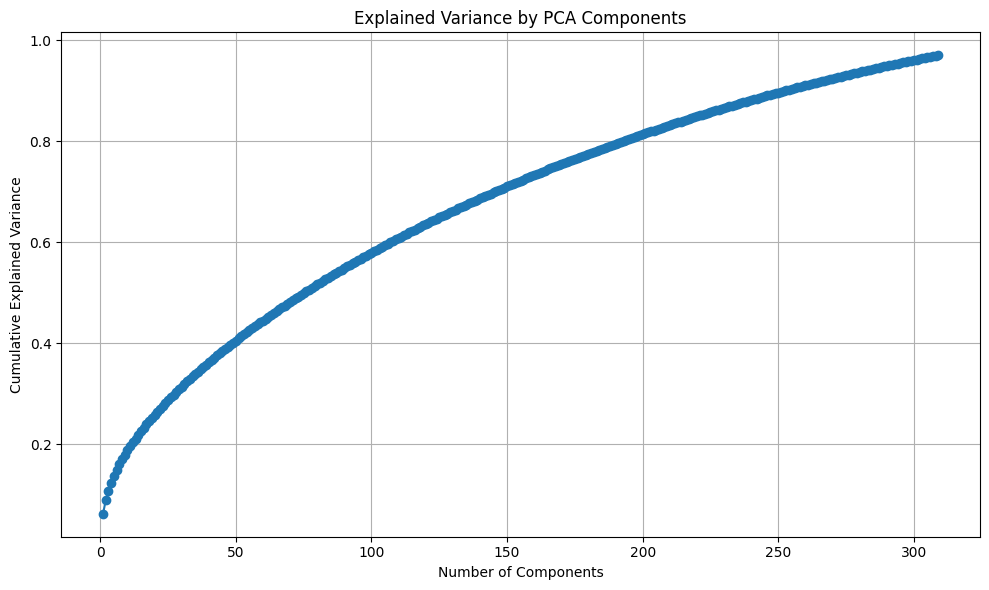

In [81]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.tight_layout()
plt.show()

In [82]:
def find_optimal_k(data, max_k):
    wss = [] # Within-Cluster-Sum-of-Squares
    silhouette_scores = []
    for i in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
        if i > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    # Plotting the WSS
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), wss, marker='o', linestyle='--')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WSS (Inertia)')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.show()
    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score for Various Numbers of Clusters (k)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.show()

Calculating optimal 'k' for PCA-reduced data...


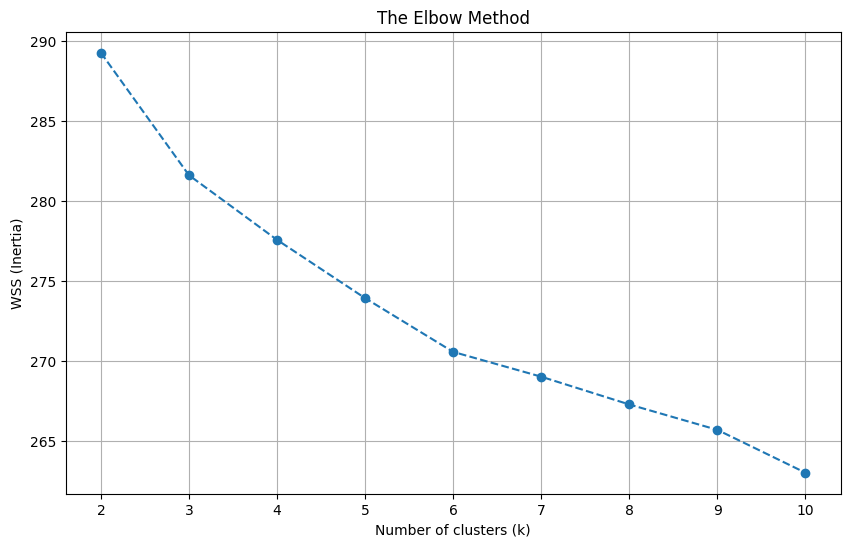

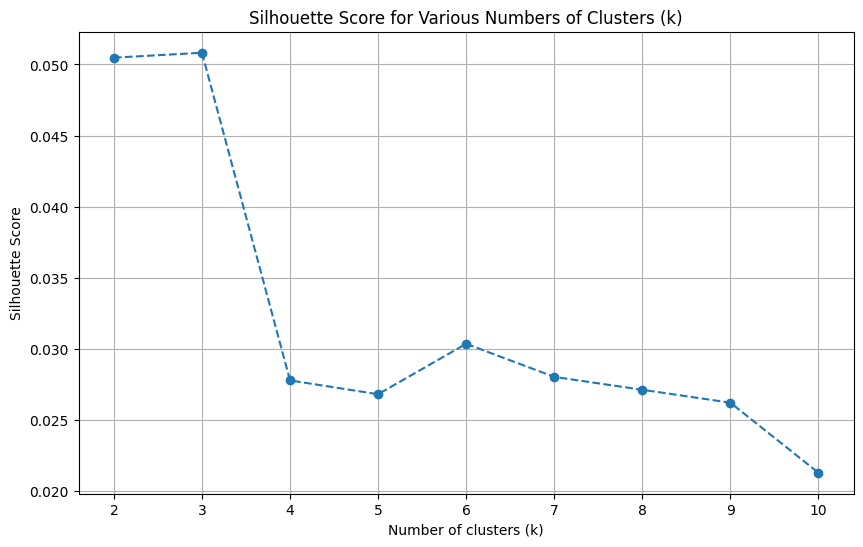

In [83]:
print("Calculating optimal 'k' for PCA-reduced data...")
find_optimal_k(resume_pca_matrix, max_k=10)

In [84]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', n_init=10, random_state=42)
kmeans.fit(resume_tfidf)

# Assign cluster labels back to the dataframe
resume_texts['Resume_Cluster_KMeans'] = kmeans.labels_
print(f"Assigned resumes to {k_optimal} clusters.")
print("\nCluster distribution:")
print(resume_texts['Resume_Cluster_KMeans'].value_counts())

Assigned resumes to 3 clusters.

Cluster distribution:
Resume_Cluster_KMeans
1    152
0    147
2     45
Name: count, dtype: int64


In [85]:
def plot_cluster_word_clouds(kmeans_model, tfidf_vectorizer, n_clusters):
    print("\nTop terms per cluster:")
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf_vectorizer.get_feature_names_out()
    
    for i in range(n_clusters):
        top_terms_list = [terms[ind] for ind in order_centroids[i, :20]]
        top_terms_str = " ".join(top_terms_list)
        
        print(f"Cluster {i}: {', '.join(top_terms_list[:10])}\n")
        
        wordcloud = WordCloud(width=600, height=300, background_color='white').generate(top_terms_str)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Cluster {i}")
        plt.show()

In [86]:
import os

In [87]:
def plot_and_save_cluster_word_clouds(kmeans_model, tfidf_vectorizer, n_clusters):

    print(f"\n===== Analysis for k={n_clusters} =====")
    
    # Define the base directory for saving images
    base_save_dir = f'../docs/KMeans/K{n_clusters}'
    # Create the directory if it doesn't exist
    os.makedirs(base_save_dir, exist_ok=True)
    
    # Get the top terms for each cluster from the model's centroids
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf_vectorizer.get_feature_names_out()
    
    for i in range(n_clusters):
        top_terms_list = [terms[ind] for ind in order_centroids[i, :20]]
        top_terms_str = " ".join(top_terms_list)
        
        print(f"\nCluster {i}: {', '.join(top_terms_list[:10])}")
        
        wordcloud = WordCloud(width=600, height=300, background_color='white').generate(top_terms_str)
        
        fig = plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Cluster {i} (k={n_clusters})")
        
        # Define the full path to save the image
        save_path = os.path.join(base_save_dir, f'cluster_{i}.png')
        # Save the figure before showing it
        plt.savefig(save_path, bbox_inches='tight')
        print(f"  -> Saved word cloud to: {save_path}")
        
        plt.show() # Display the plot in the notebook
        plt.close(fig) # Close the figure to free up memory


===== Analysis for k=2 =====

Cluster 0: data, learning, machine, 2019, technology, python, 2020, analysis, processing, analytics
  -> Saved word cloud to: ../docs/KMeans/K2/cluster_0.png


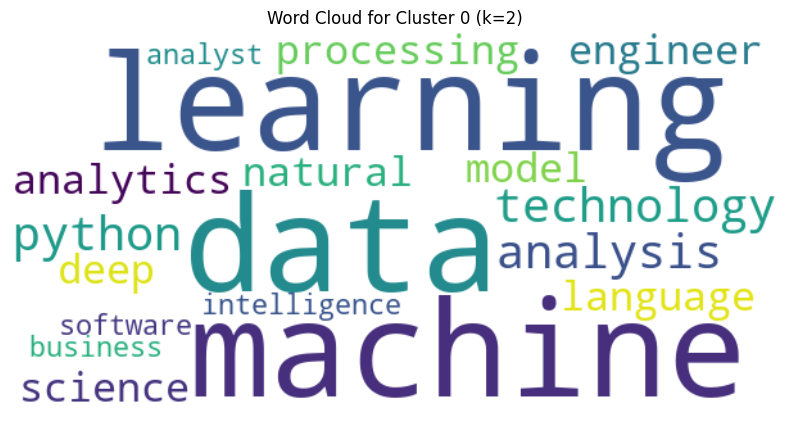


Cluster 1: company, management, accounting, engineering, financial, science, sale, account, january, university
  -> Saved word cloud to: ../docs/KMeans/K2/cluster_1.png


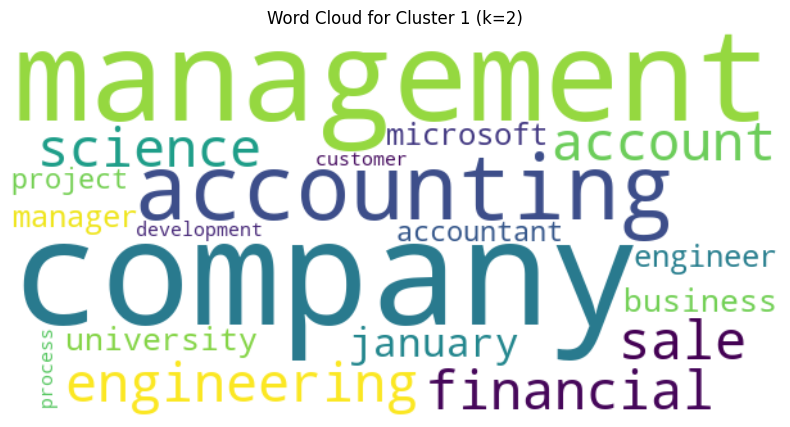


===== Analysis for k=3 =====

Cluster 0: data, learning, machine, 2019, technology, python, 2020, analysis, processing, analytics
  -> Saved word cloud to: ../docs/KMeans/K3/cluster_0.png


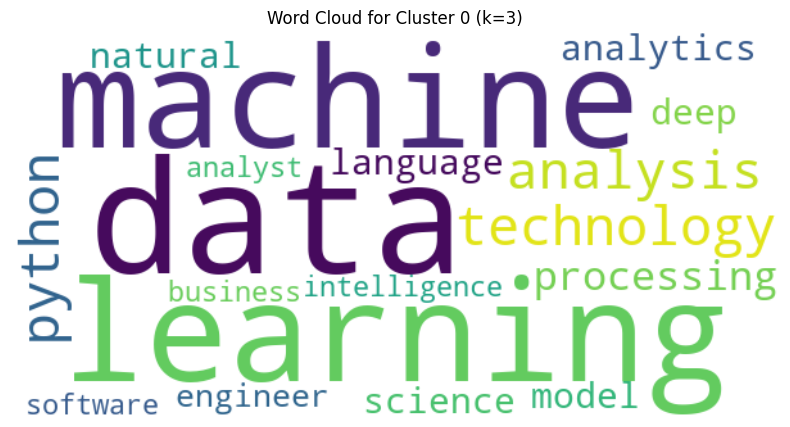


Cluster 1: company, management, engineering, science, engineer, sale, development, 01, project, university
  -> Saved word cloud to: ../docs/KMeans/K3/cluster_1.png


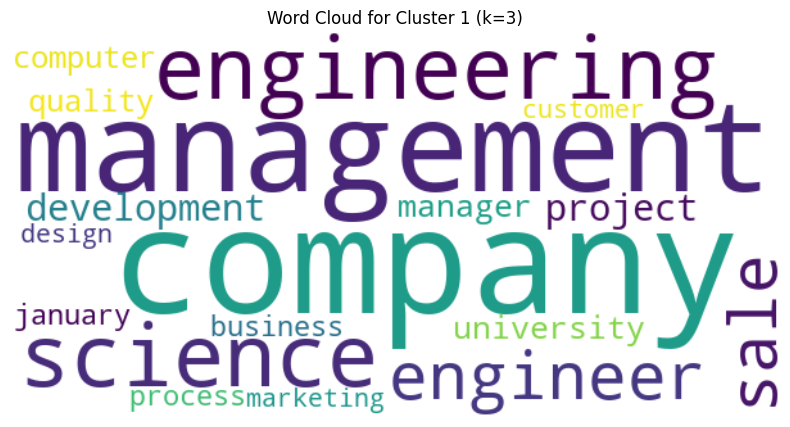


Cluster 2: accounting, financial, accountant, account, company, tax, reconciliation, ledger, statement, general
  -> Saved word cloud to: ../docs/KMeans/K3/cluster_2.png


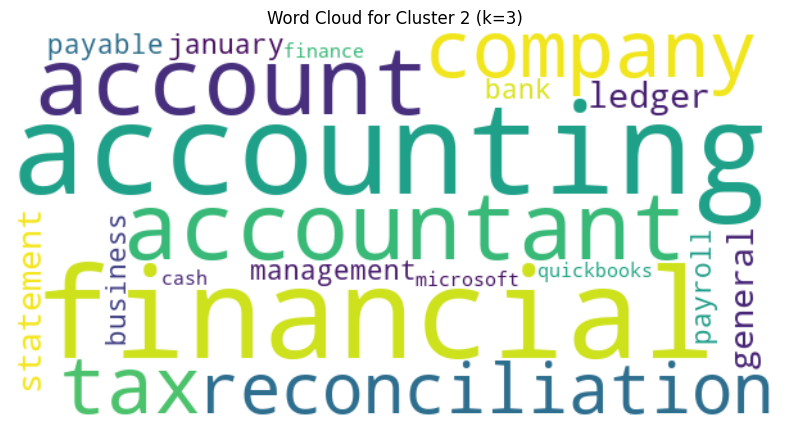


===== Analysis for k=4 =====

Cluster 0: data, learning, analysis, machine, 2020, 2019, analytics, model, python, intelligence
  -> Saved word cloud to: ../docs/KMeans/K4/cluster_0.png


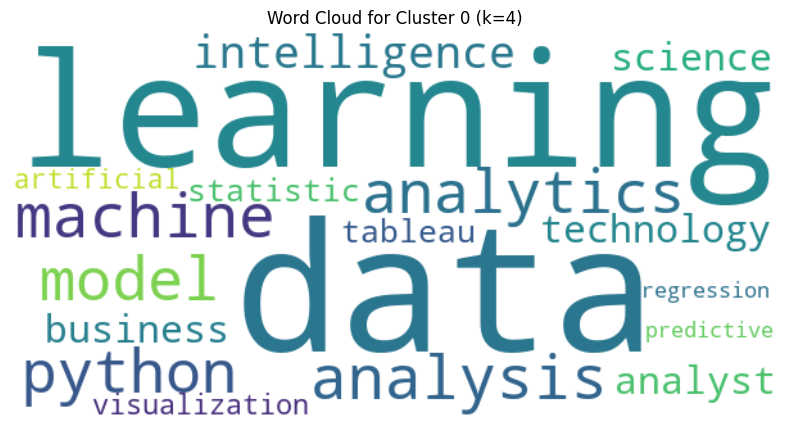


Cluster 1: company, management, engineering, science, engineer, sale, development, 01, project, university
  -> Saved word cloud to: ../docs/KMeans/K4/cluster_1.png


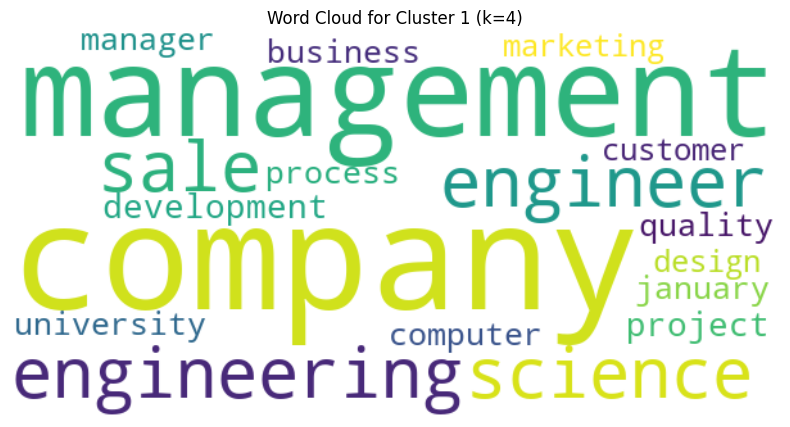


Cluster 2: accounting, financial, accountant, account, company, tax, reconciliation, ledger, statement, general
  -> Saved word cloud to: ../docs/KMeans/K4/cluster_2.png


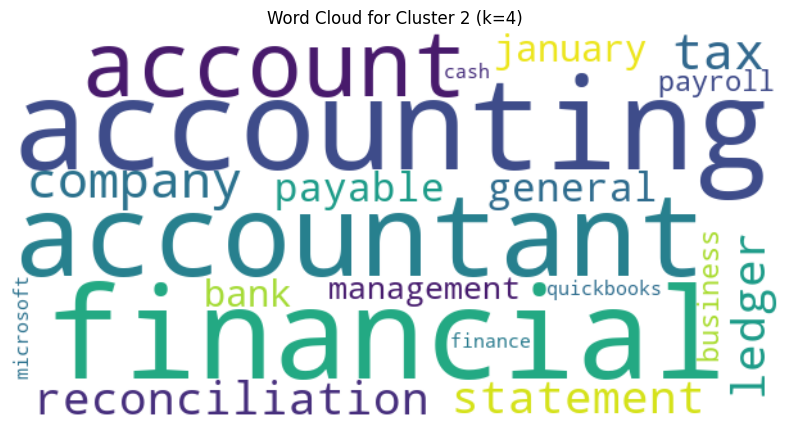


Cluster 3: learning, machine, data, processing, 2019, natural, language, technology, python, deep
  -> Saved word cloud to: ../docs/KMeans/K4/cluster_3.png


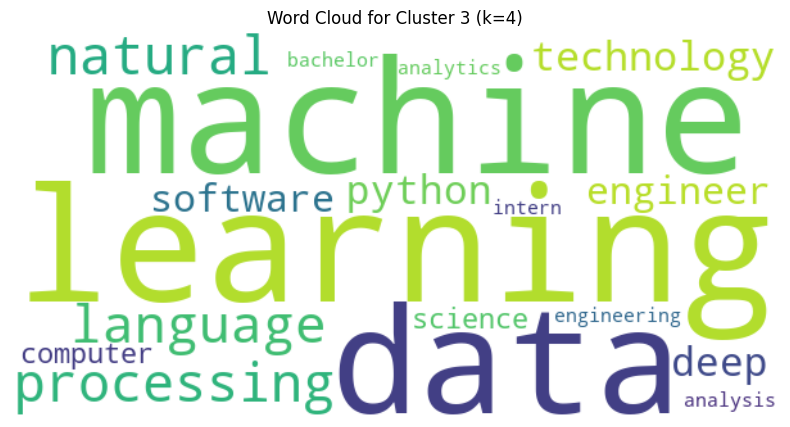


===== Analysis for k=5 =====

Cluster 0: management, company, sale, marketing, business, manager, development, 01, project, customer
  -> Saved word cloud to: ../docs/KMeans/K5/cluster_0.png


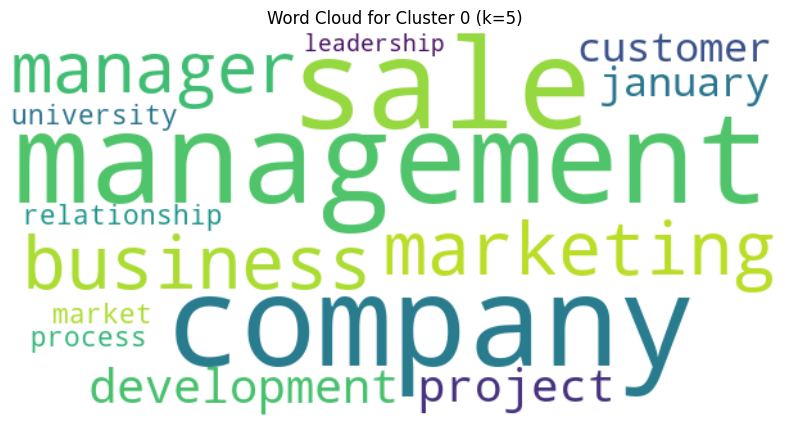


Cluster 1: company, engineering, engineer, science, computer, management, university, quality, electrical, troubleshooting
  -> Saved word cloud to: ../docs/KMeans/K5/cluster_1.png


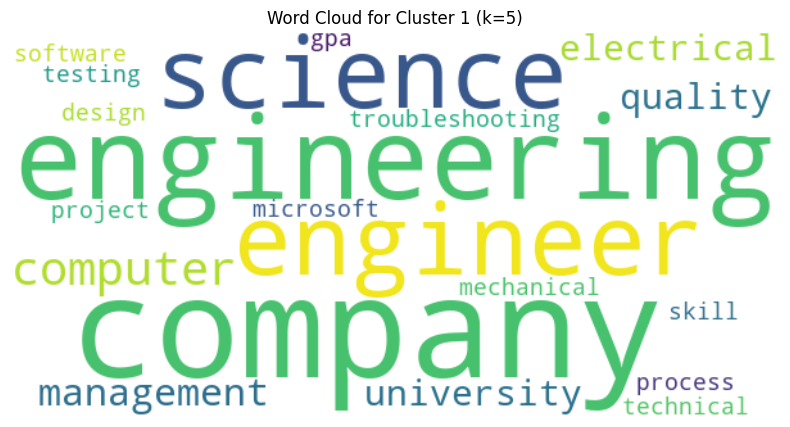


Cluster 2: learning, machine, technology, 2019, data, software, deep, engineer, processing, python
  -> Saved word cloud to: ../docs/KMeans/K5/cluster_2.png


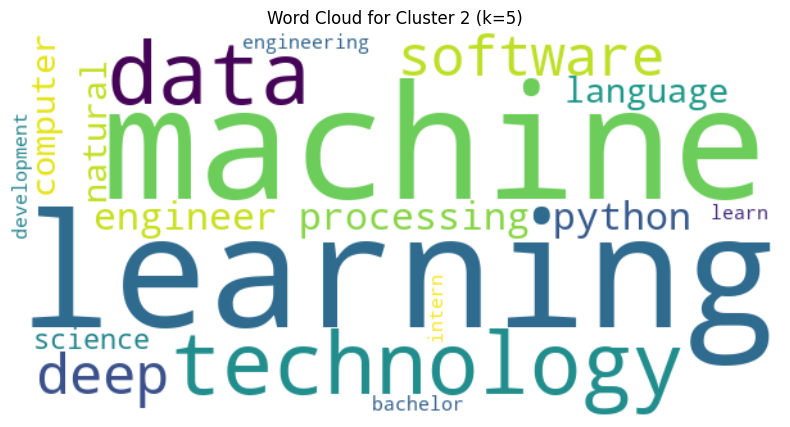


Cluster 3: accounting, financial, accountant, account, company, tax, reconciliation, ledger, statement, general
  -> Saved word cloud to: ../docs/KMeans/K5/cluster_3.png


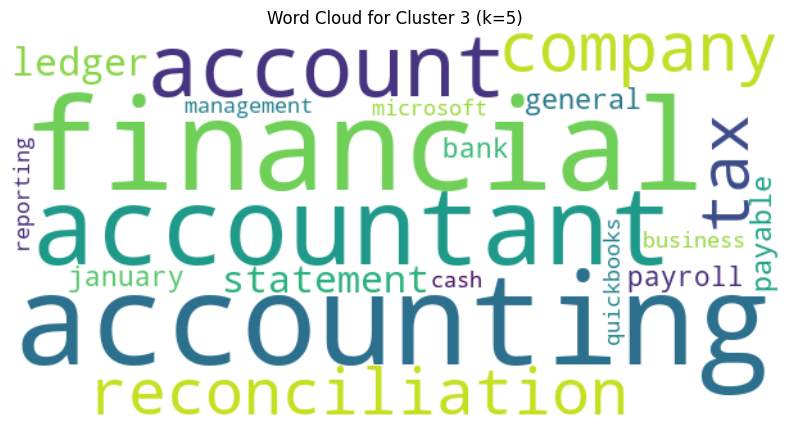


Cluster 4: data, learning, analysis, machine, analytics, python, 2019, 2020, model, business
  -> Saved word cloud to: ../docs/KMeans/K5/cluster_4.png


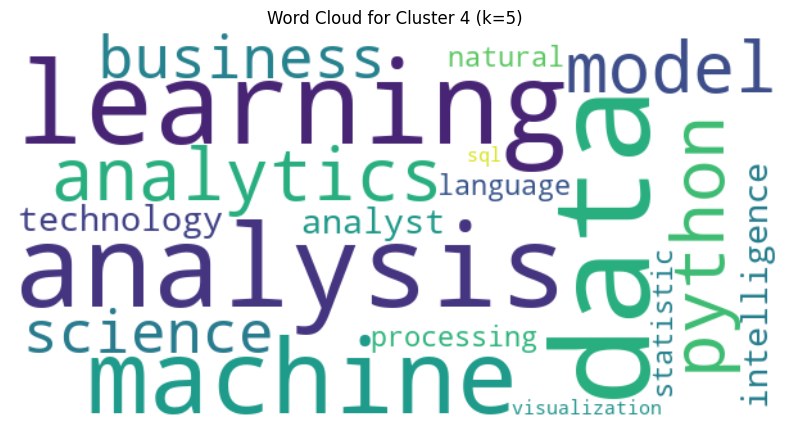


===== Analysis for k=6 =====

Cluster 0: computer, science, university, javascript, 20xx, html, 2021, engineer, research, visual
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_0.png


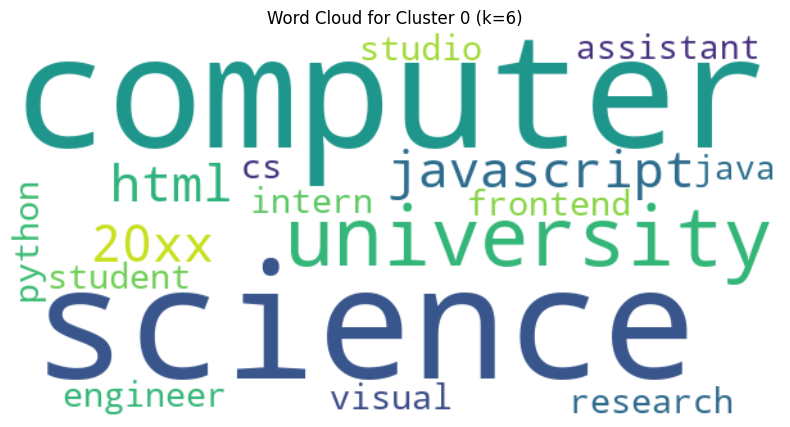


Cluster 1: data, analysis, learning, machine, 2020, analytics, business, intelligence, 2019, model
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_1.png


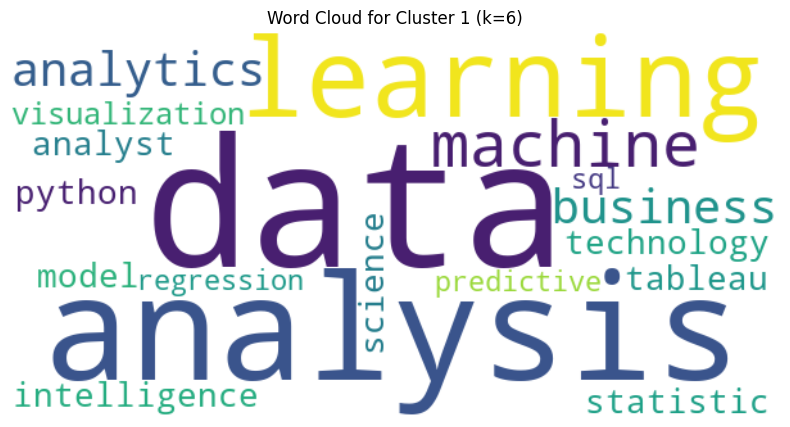


Cluster 2: company, engineering, management, engineer, project, quality, process, mechanical, design, microsoft
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_2.png


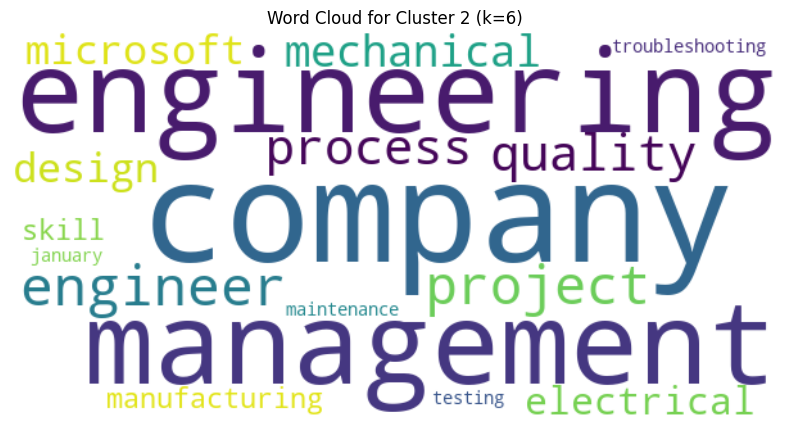


Cluster 3: accounting, financial, accountant, account, company, tax, reconciliation, ledger, statement, general
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_3.png


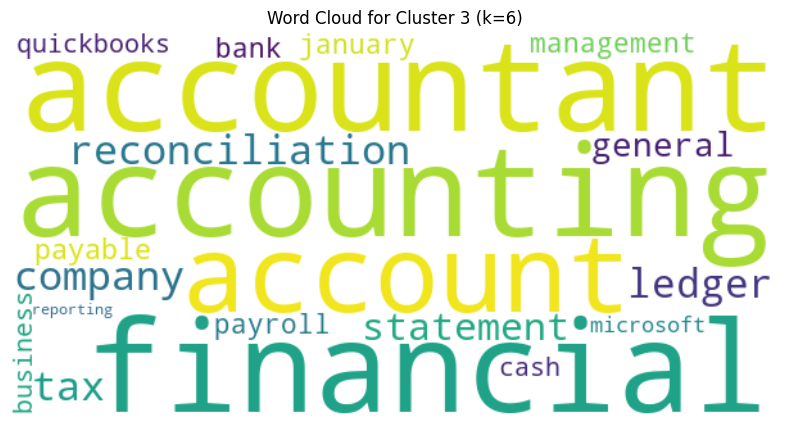


Cluster 4: sale, management, marketing, company, business, development, manager, 01, customer, relationship
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_4.png


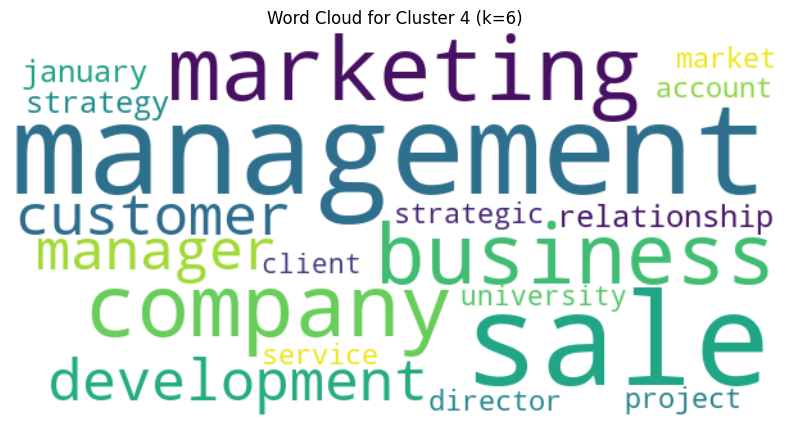


Cluster 5: learning, machine, data, 2019, processing, technology, natural, language, python, deep
  -> Saved word cloud to: ../docs/KMeans/K6/cluster_5.png


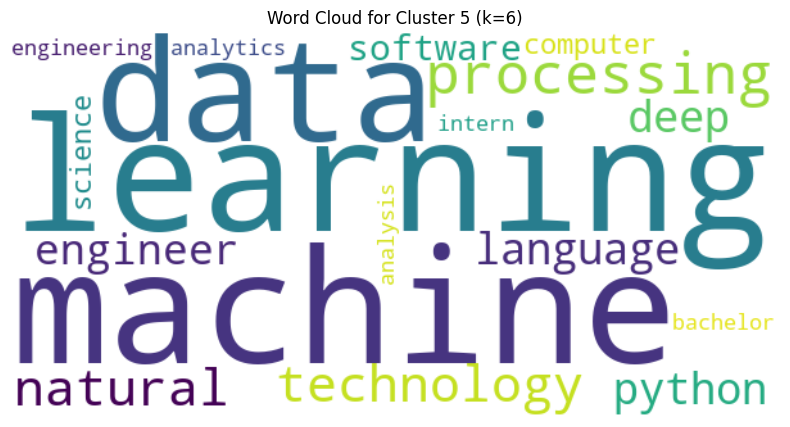

In [88]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(resume_tfidf)
    plot_and_save_cluster_word_clouds(kmeans, tfidf, k)

From K Means:
Cluster = 3 is giving good results. The clusters are distinct with good differences between the clusters as observed from the word clouds.
The distinct cluster characteristics are:
1. Data Science related jobs
2. Finance related jobs
3. Software/management related jobs

In [89]:
resume_texts

resume_text  Resume_Cluster_KMeans
0    big data analytics working database warehouse ...                      0
1    fresher looking join associate science data an...                      0
2    software development machine learning deep lea...                      0
3    obtain position fastpaced business office envi...                      1
4    professional accountant outstanding work ethic...                      2
..                                                 ...                    ...
339  fresher starting wanting join role machine lea...                      0
340  automation budget interpersonal computer liter...                      1
341  business management graduate significant exper...                      2
342  software engineering sdlc data handling data w...                      0
343  fresher looking software engineer role intern ...                      0

[344 rows x 2 columns]

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
resume_labels = kmeans.fit_predict(resume_tfidf)

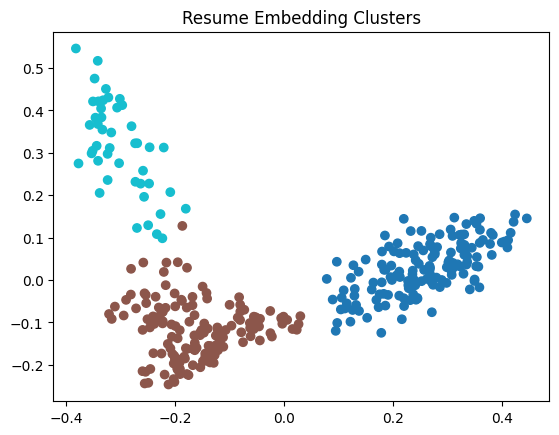

In [91]:
import matplotlib.pyplot as plt
plt.scatter(resume_pca_matrix[:,0], resume_pca_matrix[:,1], c=resume_labels, cmap='tab10')
plt.title('Resume Embedding Clusters')
plt.show()

In [92]:
# Merge the cluster labels back to the original dataframe
data_df = data_df.merge(resume_texts[['resume_text', 'Resume_Cluster_KMeans']], on='resume_text', how='left')

### Data Checkpoint 6

This is the final version of the dataset containing all engineered features.

We have found the dataset giving bad results compared to simple dataset where we have done:
1. Null value handling
2. Punctuation removal.

In [93]:
data_df.to_csv("../data/processed/6_checkpoint_final_data.csv", index=False)